# Project: PCA Representation of the MNIST Dataset
* The objective of this project is to demonstrate the application of the PCA algorithm to visualize the MNIST dataset in two different ways:
1. First, we apply the PCA using the Sckitlearn API
2. Secondly, we implement the PCA algorithm from sratch.


### Author: Mohsen Ghazel (mghazel)
* Date: May 5th, 2021

## Part 1: Python imports and global variables: 

### 1.1) Python imports:

In [20]:
#------------------------------------------------------
# Python imports and environment setup
#------------------------------------------------------
# opencv
import cv2
# numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt

# import additional functionalities
from __future__ import print_function, division
from builtins import range, input

# import the PCA algorithm from sklearn
from sklearn.decomposition import PCA

# import shuffle  from sklearn
from sklearn.utils import shuffle

# import pandas
import pandas as pd

# random number generators values
# seed for reproducing the random number generation
from random import seed
# random integers: I(0,M)
from random import randint
# random standard unform: U(0,1)
from random import random
# time
import datetime
# I/O
import os
# sys
import sys

# display figure within the notebook
%matplotlib inline

#------------------------------------------------------
# Test imports and display package versions
#------------------------------------------------------
# Testing the OpenCV version
print("OpenCV : ",cv2.__version__)
# Testing the numpy version
print("Numpy : ",np.__version__)

OpenCV :  3.4.8
Numpy :  1.19.2


#### 1.2) Global variables:

In [ ]:
# set the random_state seed = 100 for reproducibilty
random_state_seed = 100

# the number of visualized images
num_visualized_images = 25

## Part 2: Read the input data:

* We use the MINIST dataset, which was downloaded from the following link: 
  * Kaggle: Digit REcognizer: https://www.kaggle.com/c/digit-recognizer/data
  * The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.
  * Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.
  * The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

  * Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).
  

### 2.1) Load and normalize the training data sets:

In [ ]:
# read the training data set
train = pd.read_csv('../large_files/train.csv').values.astype(np.float32)
# shuffle the training data set
train = shuffle(train)
# normalize the training data to [0,1]:
x_train = train[:, 1:] / 255
# format the class type to integer
y_train = train[:, 0].astype(np.int32)

#------------------------------------------------------
# Display a summary of the training data:
#------------------------------------------------------
# the number of training images
num_train_images = x_train.shape[0]
print("----------------------------------------------")
print("Training data:")
print("----------------------------------------------")
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("Number of training images: ", num_train_images)
print("Image size: ", x_train.shape[1:])
print("----------------------------------------------")
print("Classes/labels:")
print("----------------------------------------------")
print('The target labels: ' + str(np.unique(y_train)))
print("----------------------------------------------")

### 2.2) Visualize some of the training images and their associated targets:
#### 2.2.1) First implement a visualization functionality to visualize the number of randomly selected images:

In [12]:
"""
# A utility function to visualize multiple images:
"""
def visualize_images_and_labels(num_visualized_images = 25, dataset_flag = 1):
  """To visualize images.

      Keyword arguments:
         - num_visualized_images -- the number of visualized images (deafult 25)
         - dataset_flag -- 1: training dataset, 2: test dataset
      Return:
         - None
  """
  #--------------------------------------------
  # the suplot grid shape:
  #--------------------------------------------
  num_rows = 5
  # the number of columns
  num_cols = num_visualized_images // num_rows
  # setup the subplots axes
  fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 10))
  # set a seed random number generator for reproducible results
  seed(random_state_seed)
  # iterate over the sub-plots
  for row in range(num_rows):
      for col in range(num_cols):
        # get the next figure axis
        ax = axes[row, col];
        # turn-off subplot axis
        ax.set_axis_off()
        #--------------------------------------------
        # if the dataset_flag = 1: Training data set
        #--------------------------------------------
        if ( dataset_flag == 1 ): 
          # generate a random image counter
          counter = randint(0,num_train_images)
          # get the training image
          image = np.squeeze(x_train[counter,:])
          # get the target associated with the image
          label = y_train[counter]
        #--------------------------------------------
        # dataset_flag = 2: Test data set
        #--------------------------------------------
        else: 
          # generate a random image counter
          counter = randint(0,num_test_images)
          # get the test image
          image = np.squeeze(x_test[counter,:])
          # get the target associated with the image
          label = y_test[counter]
        #--------------------------------------------
        # display the image
        #--------------------------------------------
        ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        # set the title showing the image label
        ax.set_title('y =' + str(label), size = 8)

#### 2.2.2) Call the function to visualize the randomly selected training images:

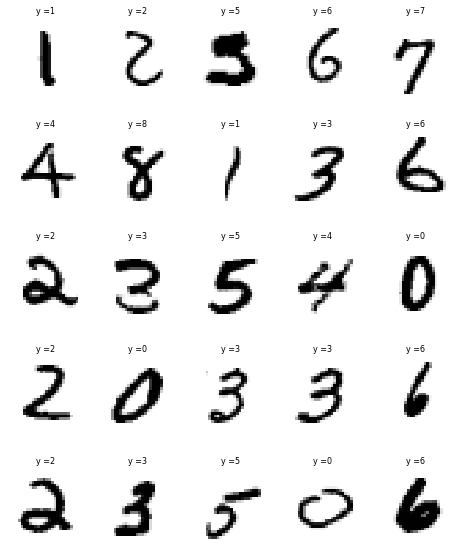

In [13]:
# the number of selected training images
num_visualized_images = 25
# call the function to visualize the training images
visualize_images_and_labels(num_visualized_images, 1)

### 2.3) Examine the number of images for each class of the training and testing subsets:

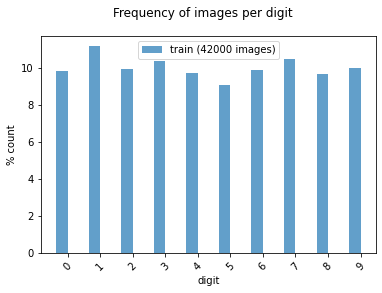

In [14]:
# create a histogram of the number of images in each class/digit:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('digit')
    plt.ylabel(ylabel_text)
 
plt.suptitle('Frequency of images per digit')
plot_bar(y_train, loc='left')
plt.legend([
    'train ({0} images)'.format(len(y_train))
]);

## Part 3: Use Scikit-learn-API:  Generate the PCA representation of the training data:

### 3.1) Visualize the 2D PCA representation of the training data

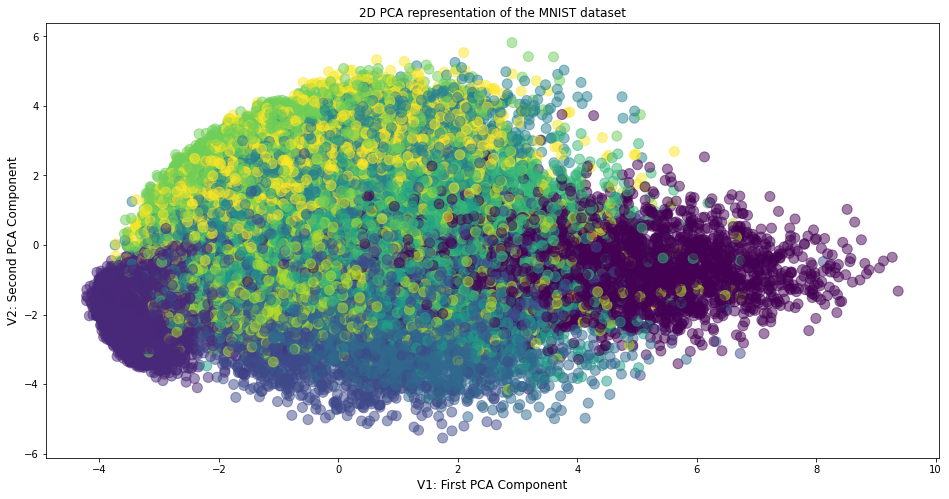

In [15]:
#----------------------------------------
# Step 3.1.1: Compute the PCA components
#----------------------------------------
# Instantiante the PCA() algorithm
pca = PCA()
# apply the PCA on the training data
reduced = pca.fit_transform(x_train)
#----------------------------------------
# Step 3.1.2: plot the first 2 PCA 
#             components
#----------------------------------------
# create a figure and set its axis
fig_size = (16,8)
# create the figure 
plt.figure(figsize=fig_size)
# plot the first 2 PCA components
plt.scatter(reduced[:,0], reduced[:,1], s=100, c=y_train, alpha=0.5)
# set the x-label
plt.xlabel('V1: First PCA Component', fontsize = 12)
# set the y-label
plt.ylabel('V2: Second PCA Component', fontsize = 12)
# set the title
plt.title('2D PCA representation of the MNIST dataset', fontsize = 12)
# show the figure
plt.show()

### 3.2) Display the explained variance variations 

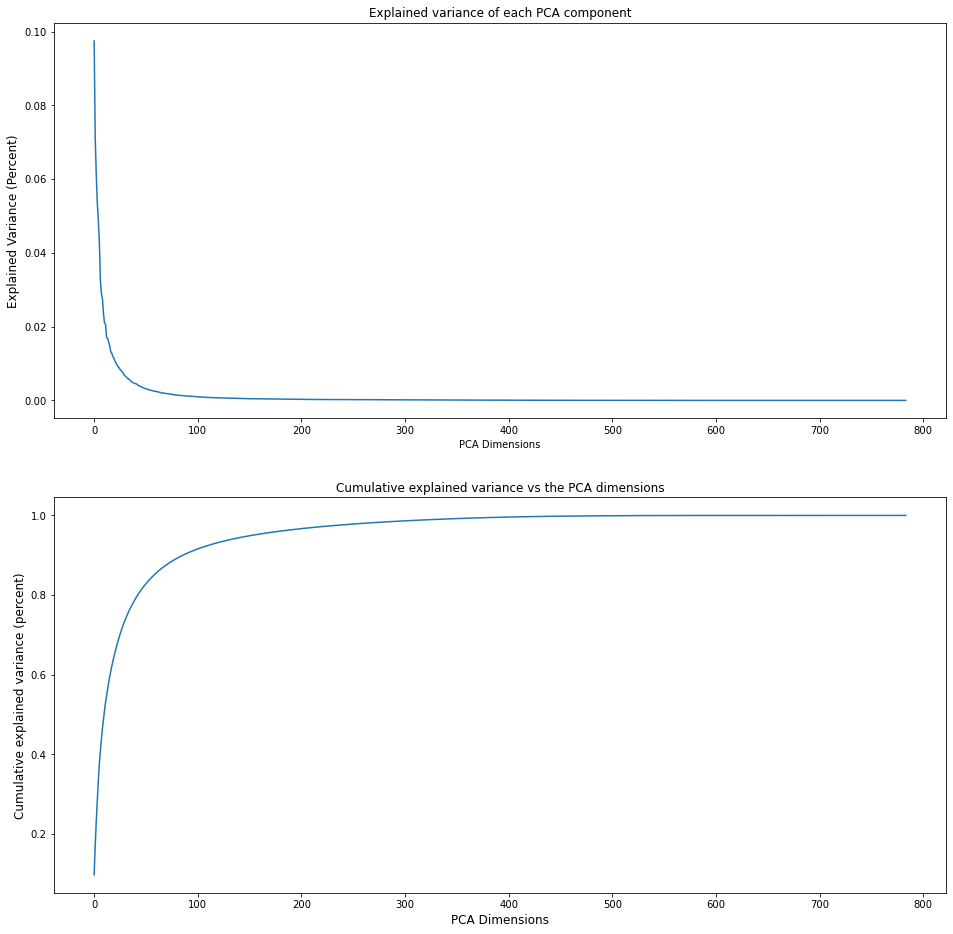

In [22]:
#----------------------------------------
# Step 3.2.1: plot the explained variance for 
#             each PCA component:
#----------------------------------------
# create a figure and set its axis
fig_size = (16,16)
# create the figure 
plt.figure(figsize=fig_size);
# the first subplot
plt.subplot(211)
# plot the the explained variance for each PCA component
plt.plot(pca.explained_variance_ratio_)
# the x-label
plt.xlabel('PCA Dimensions', fontsize = 10)
# the y-label
plt.ylabel('Explained Variance (Percent)', fontsize = 12)
# the figure title
plt.title('Explained variance of each PCA component', fontsize = 12)

#----------------------------------------
# Step 3.2.2: plot the cumulative explained 
#            variance of the PCA components
#----------------------------------------
# cumulative variance
# choose k = number of dimensions that gives us 95-99% variance
cumulative = []
last = 0
# sum-up the expplained variances for each component
# to comute the cumulative explained variance
for v in pca.explained_variance_ratio_:
    # sum the explained variance
    cumulative.append(last + v)
    # store the last comulative variance
    last = cumulative[-1]
# the second subplot
plt.subplot(212)
# display the cumulative variance
plt.plot(cumulative)
# the x-label
plt.xlabel('PCA Dimensions', fontsize = 12)
# the y-label
plt.ylabel('Cumulative explained variance (percent)', fontsize = 12)
# the figure title
plt.title('Cumulative explained variance vs the PCA dimensions', fontsize = 12)
# show the figure
plt.show()

## Part 4: From Scratch:  Generate the PCA representation of the training data:

### 4.1) Visualize the 2D PCA representation of the training data:

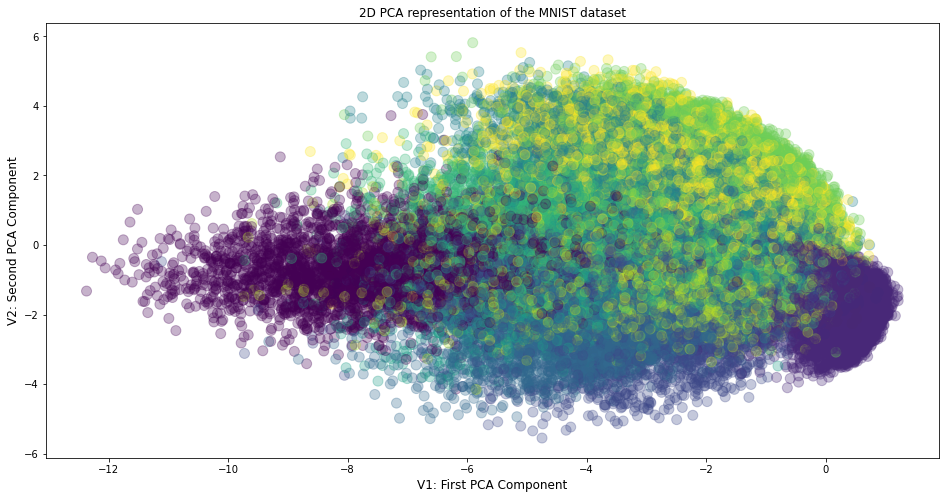

In [17]:
#----------------------------------------
# Step 4.1.1: Compute the PCA components
#----------------------------------------
# decompose covariance
covX = np.cov(x_train.T)
# compute the eigen-values and vectors of covX
lambdas, Q = np.linalg.eigh(covX)

# lambdas are sorted from smallest --> largest
# some may be slightly negative due to precision
idx = np.argsort(-lambdas)
# sort in proper order
lambdas = lambdas[idx] 
# get rid of negatives
lambdas = np.maximum(lambdas, 0) 
Q = Q[:,idx]
# compute the transformed data
Z = x_train.dot(Q)
#----------------------------------------
# Step 4.1.2: plot the first 2 PCA components
#----------------------------------------
# create a figure and set its axis
fig_size = (16,8)
# create the figure 
plt.figure(figsize=fig_size)
# plot the first 2 PCA components
plt.scatter(Z[:,0], Z[:,1], s=100, c=y_train, alpha=0.3)
# set the x-label
plt.xlabel('V1: First PCA Component', fontsize = 12)
# set the y-label
plt.ylabel('V2: Second PCA Component', fontsize = 12)
# set the title
plt.title('2D PCA representation of the MNIST dataset', fontsize = 12);
# shoe the figure
plt.show()

### 4.2) Display the explained variance variations:

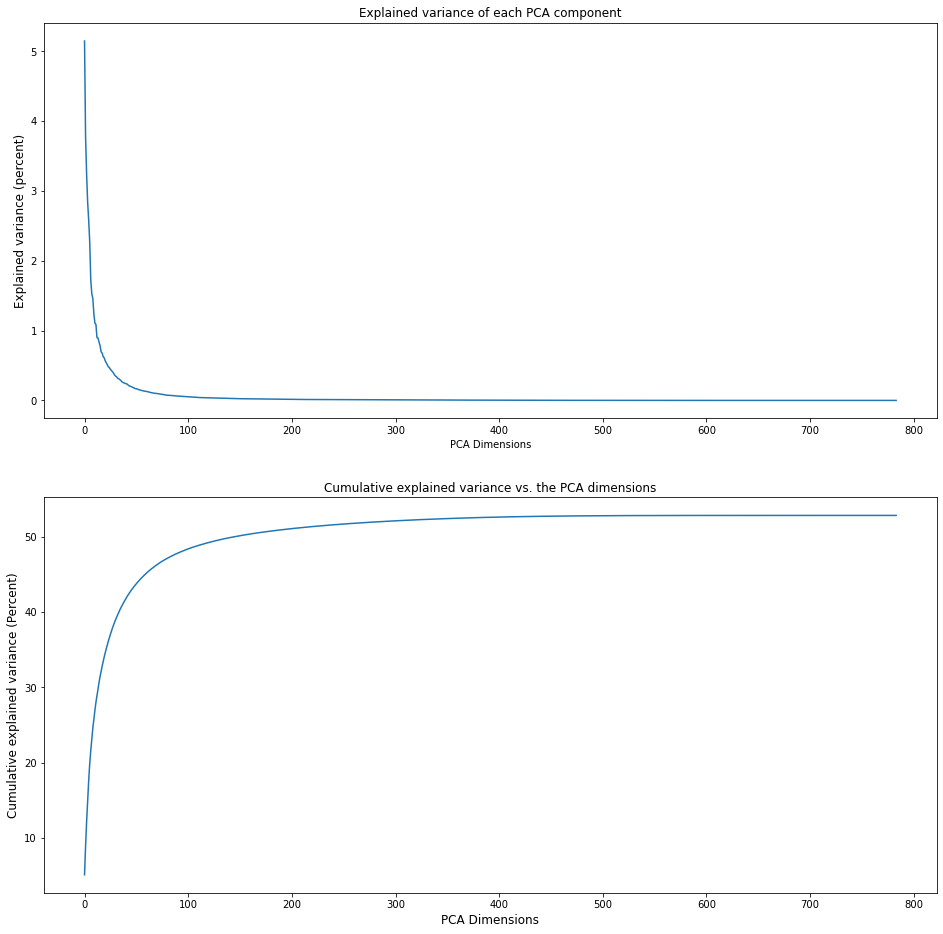

In [23]:
#----------------------------------------
# Step 4.2.1: plot the explained variance for 
#             each PCA component:
#----------------------------------------
# create a figure and set its axis
fig_size = (16,16)
# create the figure 
plt.figure(figsize=fig_size);
# the first subplot
plt.subplot(211)
# plot the the explained variance for each PCA component
plt.plot(lambdas)
# the x-label
plt.xlabel('PCA Dimensions', fontsize = 10)
# the y-label
plt.ylabel('Explained variance (percent)', fontsize = 12)
# the figure title
plt.title('Explained variance of each PCA component', fontsize = 12)

#----------------------------------------
# Step 4.2.2: plot the cumulative explained 
#            variance of the PCA components
#----------------------------------------
# the second subplot
plt.subplot(212)
# display the cumulative variance
plt.plot(np.cumsum(lambdas))
# the x-label
plt.xlabel('PCA Dimensions', fontsize = 12)
# the y-label
plt.ylabel('Cumulative explained variance (Percent)', fontsize = 12)
# the figure title
plt.title('Cumulative explained variance vs. the PCA dimensions', fontsize = 12)
# show the figure
plt.show()

#### Step 5: Display a successful execution message:

In [19]:
# display a final message
# current time
now = datetime.datetime.now()
# display a message
print('Program executed successfully on: '+ str(now.strftime("%Y-%m-%d %H:%M:%S") + "...Goodbye!\n"))

Program executed successfully on: 2021-05-09 15:38:04...Goodbye!

